In [696]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_datareader.data as data

In [697]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime.today()

df = data.DataReader('AAPL', 'stooq', start, end)

In [698]:
df = df.iloc[::-1]
df.reset_index(inplace=True)

In [699]:
df

,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
...,...,...,...,...,...,...
3338,2023-04-10,161.42000,162.03000,160.08000,162.03000,4.771688e+07
3339,2023-04-11,162.35000,162.36000,160.51000,160.80000,4.764422e+07
3340,2023-04-12,161.22000,162.06000,159.78000,160.10000,5.013306e+07
3341,2023-04-13,161.63000,165.80000,161.42000,165.56000,6.844565e+07


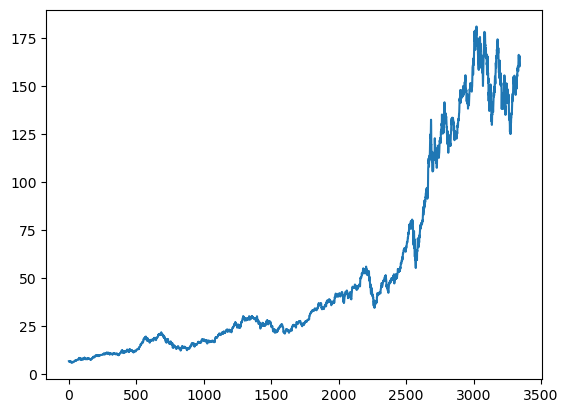

In [700]:
plt.plot(df.Close)

# Moving Average

In [701]:
# Defining 100 and 200 days moving averages
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

print(f"{ma100}\n__________________________________________________________\n{ma200}")

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3338    146.4574
3339    146.5826
3340    146.6832
3341    146.8509
3342    146.9958
Name: Close, Length: 3343, dtype: float64
__________________________________________________________
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3338    149.118220
3339    149.232975
3340    149.327330
3341    149.448985
3342    149.589925
Name: Close, Length: 3343, dtype: float64


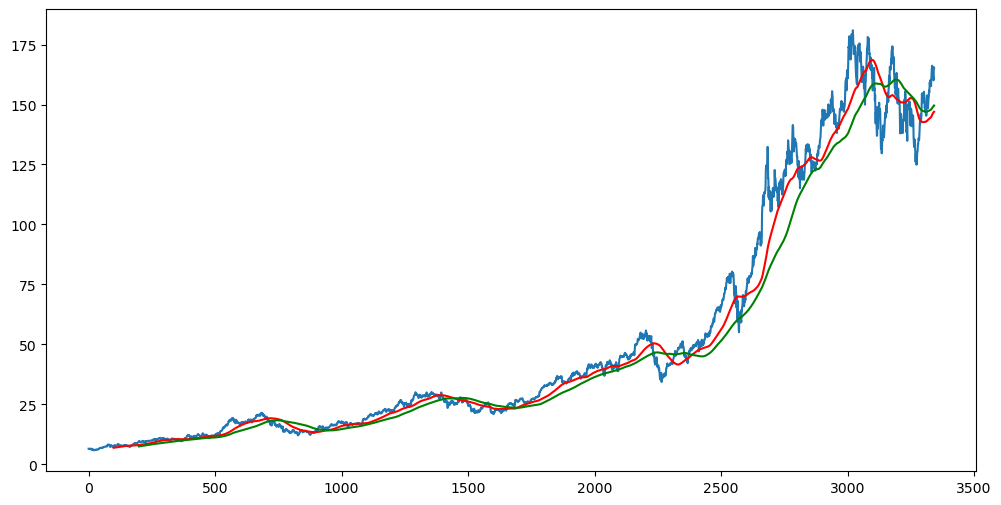

In [702]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

# Splitting training and testing data

In [703]:
df_train = pd.DataFrame(df.Close[0:int(len(df)*0.75)])
df_test = pd.DataFrame(df.Close[int(len(df)*0.75):int(len(df))])

print(df_train.shape)
print(df_test.shape)

(2507, 1)
(836, 1)


# Scaling data

In [704]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [705]:
df_train_array = scaler.fit_transform(df_train)
df_test_array = scaler.fit_transform(df_test)

# Making input and prediction arrays

In [706]:
x_train = []
y_train = []

for i in range(100, df_train_array.shape[0]):
    x_train.append(df_train_array[i-100: i])
    y_train.append(df_train_array[i, 0])

In [707]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [708]:
x_train.shape

(2407, 100, 1)

In [709]:
y_train.shape

(2407,)

# Making ML model

In [710]:
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [711]:
# 1st layer
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# 2nd layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

# 3rd layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

# 4th layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [712]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_88 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_88 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_89 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_89 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_90 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_90 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_91 (LSTM)              (None, 120)             

In [713]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 30)

Epoch 1/30
76/76 [==============================] - 16s 161ms/step - loss: 0.0214
Epoch 2/30
76/76 [==============================] - 13s 165ms/step - loss: 0.0051
Epoch 3/30
76/76 [==============================] - 13s 169ms/step - loss: 0.0047
Epoch 4/30
76/76 [==============================] - 13s 174ms/step - loss: 0.0042
Epoch 5/30
76/76 [==============================] - 13s 170ms/step - loss: 0.0043
Epoch 6/30
76/76 [==============================] - 13s 170ms/step - loss: 0.0042
Epoch 7/30
76/76 [==============================] - 13s 170ms/step - loss: 0.0042
Epoch 8/30
76/76 [==============================] - 13s 171ms/step - loss: 0.0037
Epoch 9/30
76/76 [==============================] - 13s 175ms/step - loss: 0.0039
Epoch 10/30
76/76 [==============================] - 14s 181ms/step - loss: 0.0033
Epoch 11/30
76/76 [==============================] - 14s 183ms/step - loss: 0.0035
Epoch 12/30
76/76 [==============================] - 13s 177ms/step - loss: 0.0033
Epoch 13/30
7

In [714]:
model.save('stock_trend_predictor')

INFO:tensorflow:Assets written to: stock_trend_predictor\assets


In [715]:
past_100_days = df_train.tail(100)
final_df = past_100_days.append(df_test, ignore_index=True)

C:\Users\Shantanu\AppData\Local\Temp\ipykernel_12376\2999055065.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(df_test, ignore_index=True)


In [716]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(936, 1)

In [717]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(836, 100, 1)
(836,)


# Making Predictions

In [718]:
y_pred = model.predict(x_test)

27/27 [==============================] - 2s 65ms/step


In [719]:
y_pred.shape

(836, 1)

In [720]:
scaler.scale_

array([0.0074669])

In [721]:
scale_factor = 1/0.0074669
y_test = y_test*scale_factor
y_pred = y_pred*scale_factor

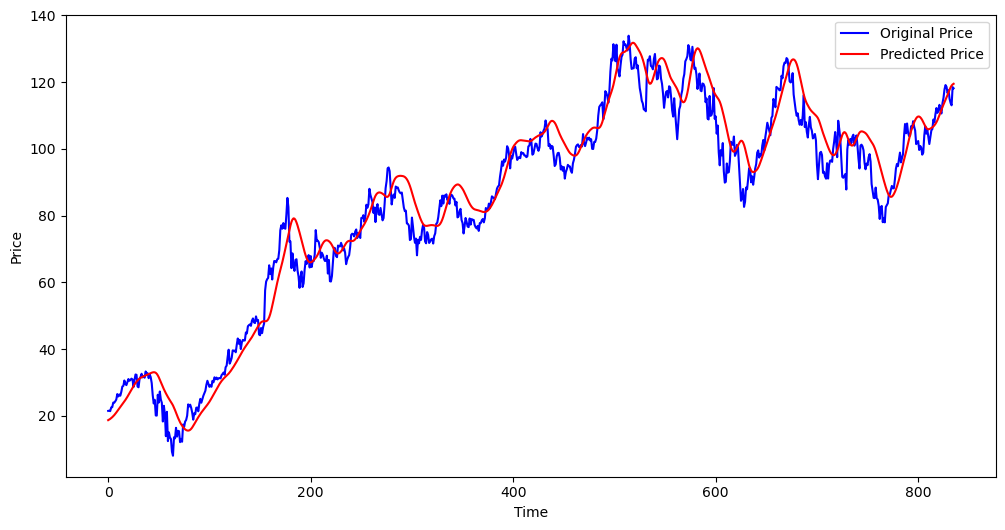

In [722]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()